In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


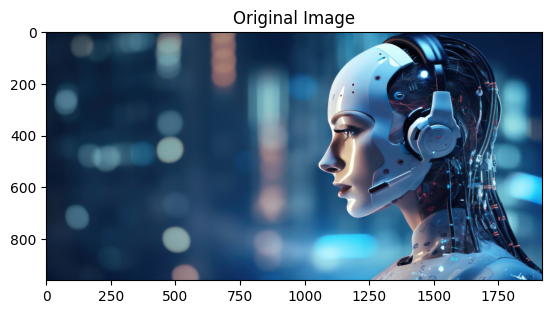

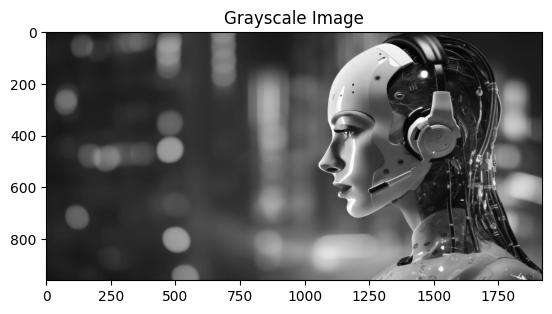

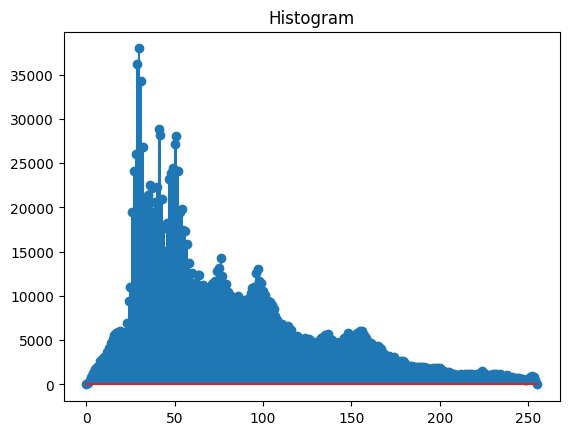

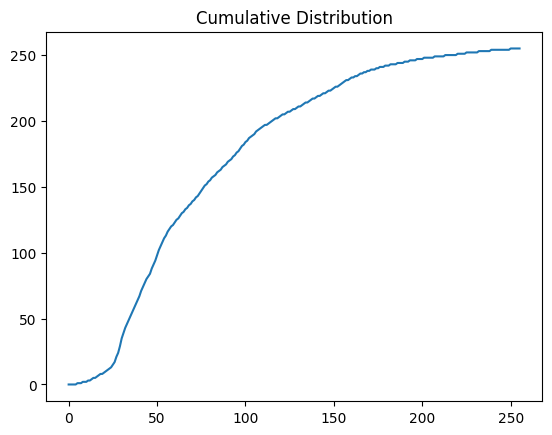

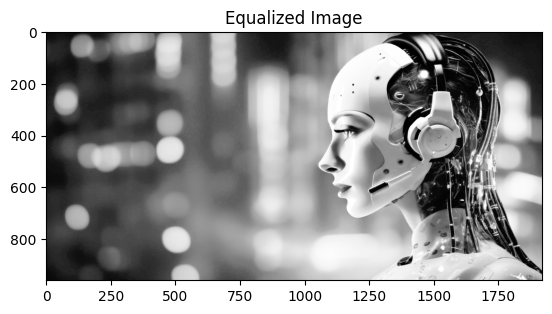

In [2]:
# Load the image
Irgb = Image.open('ai.jpeg')
Irgb = Irgb.convert('RGB')  # Ensure the image is in RGB format
plt.figure()
plt.imshow(Irgb)
plt.title("Original Image")
plt.show()

# Convert the RGB image to grayscale
Igray = Irgb.convert('L')  # Convert to grayscale
Igray = np.array(Igray)
plt.figure()
plt.imshow(Igray, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Get the size of the image
M, N = Igray.shape

# Initialize the histogram
h = np.zeros(256)

# Calculate the histogram
for r in range(M):
    for c in range(N):
        indis = Igray[r, c]
        h[indis] += 1

# Display the histogram
plt.figure()
plt.stem(h)  # Removed 'use_line_collection' argument
plt.title("Histogram")
plt.show()

p = h / (M * N)

s = np.zeros(256)
s[0] = p[0]
for i in range(1, 256):
    s[i] = s[i - 1] + p[i]

# Scale the cumulative distribution
s = np.round(255 * s).astype(np.uint8)

# Display the cumulative distribution
plt.figure()
plt.plot(s)
plt.title("Cumulative Distribution")
plt.show()

# Apply histogram equalization
Iout = np.zeros_like(Igray)
for r in range(M):
    for c in range(N):
        indis = Igray[r, c]
        Iout[r, c] = s[indis]

# Show the equalized image
plt.figure()
plt.imshow(Iout, cmap='gray')
plt.title("Equalized Image")
plt.show()